In [ ]:
import pandas as pd
import numpy as np
np.set_printoptions(formatter={'float_kind':"{:3.2f}".format})
from sklearn.neighbors import KNeighborsClassifier
# model evaluation routines
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
def classification_confint(acc, n):
    '''
    Compute the 95% confidence interval for a classification problem.
      acc -- classification accuracy
      n   -- number of observations used to compute the accuracy
    Returns a tuple (lb,ub)
    '''
    import math
    interval = 1.96*math.sqrt(acc*(1-acc)/n)
    lb = max(0, acc - interval)
    ub = min(1.0, acc + interval)
    return (lb,ub)

In [5]:
url = "https://vincentarelbundock.github.io/Rdatasets/csv/robustbase/CrohnD.csv"
crohn_df = pd.read_csv(url)

In [6]:
crohn_df

,Unnamed: 0,ID,nrAdvE,BMI,height,country,sex,age,weight,treat
0,1,19908,4,25.22,163,c1,F,47,67,placebo
1,2,19909,4,23.80,164,c1,F,53,64,d1
2,3,19910,1,23.05,164,c1,F,68,62,placebo
3,4,20908,1,25.71,165,c1,F,48,70,d2
4,5,20909,2,25.95,170,c1,F,67,75,placebo
...,...,...,...,...,...,...,...,...,...,...
112,113,54933,2,26.45,165,c2,F,73,72,placebo
113,114,54934,1,19.11,150,c2,F,49,43,d2
114,115,54935,1,44.06,158,c2,F,47,110,d1
115,116,54936,0,25.81,155,c2,F,66,62,d1


In [7]:
crohn_df = crohn_df.drop(["Unnamed: 0"], axis=1)
crohn_df = crohn_df.drop(["ID"], axis=1)

In [8]:
crohn_df = crohn_df.replace(to_replace='c1', value=0)
crohn_df = crohn_df.replace(to_replace='c2', value=1)
crohn_df = crohn_df.replace(to_replace='M', value=0)
crohn_df = crohn_df.replace(to_replace='F', value=1)

In [9]:
crohn_df

,nrAdvE,BMI,height,country,sex,age,weight,treat
0,4,25.22,163,0,1,47,67,placebo
1,4,23.80,164,0,1,53,64,d1
2,1,23.05,164,0,1,68,62,placebo
3,1,25.71,165,0,1,48,70,d2
4,2,25.95,170,0,1,67,75,placebo
...,...,...,...,...,...,...,...,...
112,2,26.45,165,1,1,73,72,placebo
113,1,19.11,150,1,1,49,43,d2
114,1,44.06,158,1,1,47,110,d1
115,0,25.81,155,1,1,66,62,d1


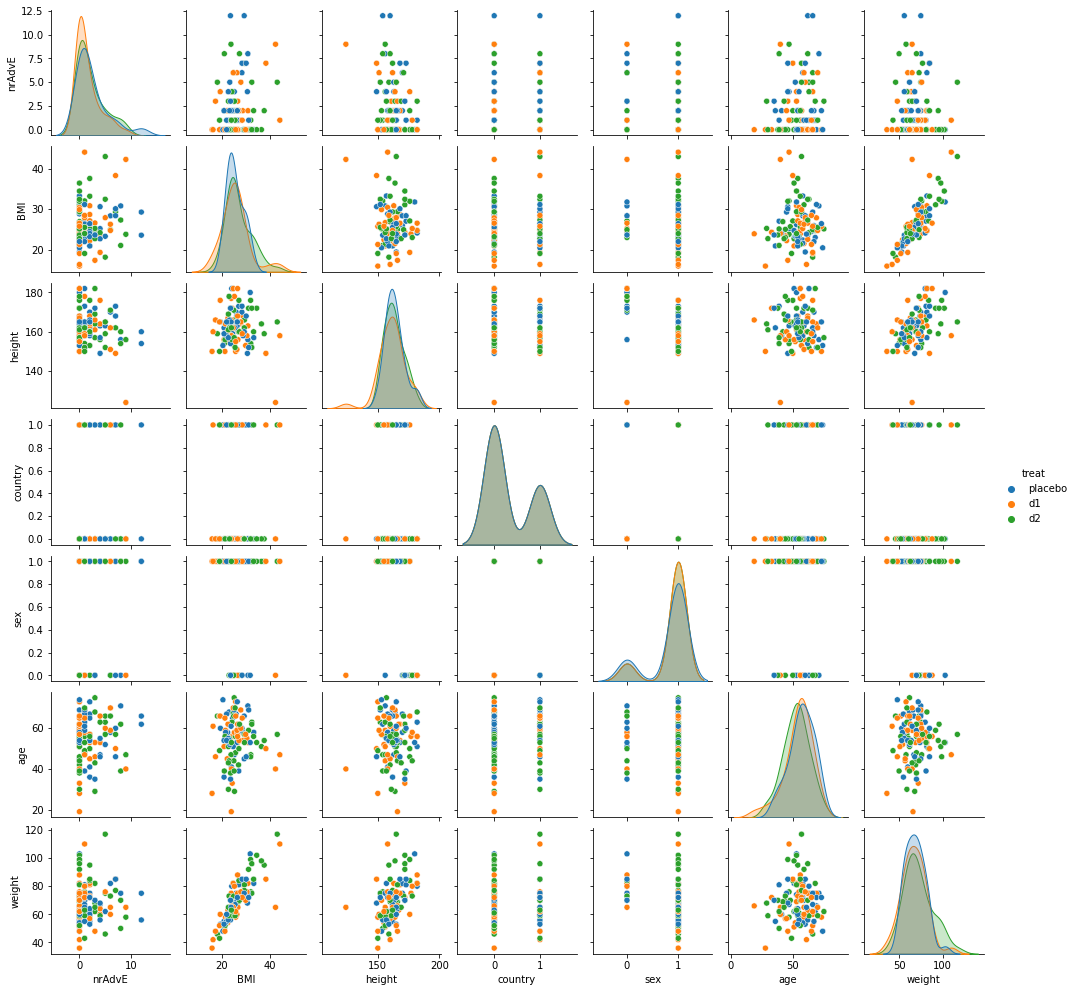

In [10]:
sns.pairplot(crohn_df, hue='treat', height=2)

In [11]:
X  = crohn_df.drop(['treat'],axis=1)
actual_y = crohn_df['treat']

In [12]:
# KNN
model = KNeighborsClassifier()

# grid search
param_grid = {'n_neighbors': list(range(1,51))}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, actual_y)
print("Grid Search: best parameters: {}".format(grid.best_params_))

Grid Search: best parameters: {'n_neighbors': 11}


In [13]:
# accuracy of best model with confidence interval
best_model = grid.best_estimator_
predict_y = best_model.predict(X)
acc = accuracy_score(actual_y, predict_y)
lb,ub = classification_confint(acc,X.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

Accuracy: 0.48 (0.39,0.57)


In [14]:
# build the confusion matrix
labels = ['placebo', 'd1','d2']
cm = confusion_matrix(actual_y, predict_y, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Confusion Matrix:
         placebo  d1  d2
placebo       17   9  13
d1            10  23   6
d2            11  12  16


**MLP 1**

In [15]:
# neural network
model = MLPClassifier(max_iter=10000)

# grid search
param_grid = {'hidden_layer_sizes': [ (10,),(11,),(12,),(13,),(14,),(15,),
                                     (16,),(17,),(18,),(19,),(20,)]}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, actual_y)
print("Grid Search: best parameters: {}".format(grid.best_params_))




Grid Search: best parameters: {'hidden_layer_sizes': (10,)}


In [16]:
# evaluate the best model
best_model = grid.best_estimator_
predict_y = best_model.predict(X)
acc = accuracy_score(actual_y, predict_y)
lb,ub = classification_confint(acc,X.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

# buld confusion matrix
labels = ['placebo', 'd1','d2']
cm = confusion_matrix(actual_y, predict_y, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Accuracy: 0.43 (0.34,0.52)
Confusion Matrix:
         placebo  d1  d2
placebo       17  11  11
d1            15  13  11
d2            11   8  20


**MLP 2**

In [17]:
# neural network
model2 = MLPClassifier(max_iter=10000)

# grid search
param_grid2 = {'hidden_layer_sizes': [ (10,10),(11,10),(12,10),(13,10),(14,10),(15,10),
                                     (16,10),(17,10),(18,10),(19,10),(20,10)]}
grid2 = GridSearchCV(model2, param_grid2, cv=5)
grid2.fit(X, actual_y)
print("Grid Search: best parameters: {}".format(grid2.best_params_))


Grid Search: best parameters: {'hidden_layer_sizes': (15, 10)}


In [18]:
# evaluate the best model
best_model2 = grid2.best_estimator_
predict_y2 = best_model2.predict(X)
acc2 = accuracy_score(actual_y, predict_y2)
lb2,ub2 = classification_confint(acc2,X.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc2,lb2,ub2))

# buld confusion matrix
labels = ['placebo', 'd1','d2']
cm2 = confusion_matrix(actual_y, predict_y, labels=labels)
cm_df2 = pd.DataFrame(cm2, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df2))

Accuracy: 0.35 (0.26,0.44)
Confusion Matrix:
         placebo  d1  d2
placebo       17  11  11
d1            15  13  11
d2            11   8  20


**MLP 3**

In [19]:
# neural network
model3 = MLPClassifier(max_iter=10000,activation='logistic')

# grid search
param_grid3 = {'hidden_layer_sizes': [ (10,10),(11,10),(12,10),(13,10),(14,10),(15,10),
                                     (16,10),(17,10),(18,10),(19,10),(20,10)]}
grid3 = GridSearchCV(model3, param_grid3, cv=5)
grid3.fit(X, actual_y)
print("Grid Search: best parameters: {}".format(grid3.best_params_))

Grid Search: best parameters: {'hidden_layer_sizes': (14, 10)}


In [20]:
# evaluate the best model
best_model3 = grid3.best_estimator_
predict_y3 = best_model3.predict(X)
acc3 = accuracy_score(actual_y, predict_y3)
lb3,ub3 = classification_confint(acc3,X.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc3,lb3,ub3))

# buld confusion matrix
labels = ['placebo', 'd1','d2']
cm3 = confusion_matrix(actual_y, predict_y, labels=labels)
cm_df3 = pd.DataFrame(cm3, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df3))

Accuracy: 0.38 (0.30,0.47)
Confusion Matrix:
         placebo  d1  d2
placebo       17  11  11
d1            15  13  11
d2            11   8  20
